## **DSC 680 -PROJECT 2 - Sentiment Analysis**

### Vijaykumar Mehtre

This project will focus on performing a sentiment analysis on some tweets in Twitter which will be chosen as the project progresses. The main goal of this analysis is to discover the underlying sentiment from a users tweet. The opinions that are mined will be classified into two categories positive and negative. An analysis will then be performed on the classified data to see what percentage of the population sample fall into each category.

**Sentiment analysis** can be defined as a process that automates mining of attitudes, opinions, views and emotions from text, speech, tweets and database sources through Natural Language Processing (NLP). 

Sentiment analysis involves classifying opinions in text into categories like "positive" or "negative" or "neutral". 

It's also referred as subjectivity analysis, opinion mining, and appraisal extraction. 


The words **opinion, sentiment, view and belief** are used interchangeably but there are differences between them. 

- **Opinion** : A conclusion open to dispute (because different experts have different opinions ) 
- **View** : subjective opinion 
- **Belief**: deliberate acceptance and intellectual assent 
- **Sentiment**: opinion representing one’s feelings 

Sentiment analysis and Natural Language processsing are very important area nowadays. There is a massive amount of information being uploaded to the internet daily on social media websites and blogs that computers cannot understand. 

Traditionally it was not possible to process such large amounts of data, but with computer performance following the projections of Moore’s law and the introduction of distributed computing like Hadoop or Apache Spark, large data sets can now be processed with relative ease. With further research and investment into this area, computers will soon be able to gain an understanding from text which will greatly improve data analytics and search engines.

A good use case is to identify a customer’s perception for a product, this is an extremely valuable data to some companies. From the knowledge gained from an analysis such as this a company can identify issues with their products, spot trends before their competitors, create improved communications with their target audience, and gain valuable insight into how effective their marketing campaigns were. Through this knowledge companies gain valuable feedback which allows them to further develop the next generation of their product.

In [1]:
## Import Libraries

# plotting
import seaborn as sns
# sklearn
import sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import tweepy as tw 
import pandas as pd 
import numpy as np
import csv 
import re 
import string # Inbuilt string library
import glob 
import random 
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting


# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer

from textblob import TextBlob # TextBlob - Python library for processing textual data

import plotly.express as px # To make express plots in Plotly
import chart_studio.tools as cst # For exporting to Chart studio
import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio
import plotly.offline as pyo # Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go # For plotting plotly graph objects
from plotly.subplots import make_subplots #to make more than one plot in Plotly


# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud


This section will highlight the technical approach that will be followed for this project and will include the system description.



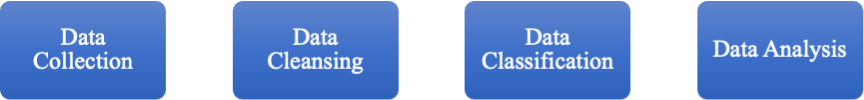

### Data Collection

The dataset provided is the Sentiment140 Dataset which consists of 1,600,000 tweets that have been extracted using the Twitter API. I am using this dataset from Kaggel (https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download).The various columns present in the dataset are:
- **target**: the polarity of the tweet (positive or negative)
- **ids**: Unique id of the tweet
- **date**: the date of the tweet
- **flag**: It refers to the query. If no such query exists then it is NO QUERY.
- **user**: It refers to the name of the user that tweeted
- **text**: It refers to the text of the tweet

In [2]:
dbColumns=['target','ids','date','flag','user','text']
dbEncoding = "ISO-8859-1"
df = pd.read_csv('data/training.1600000.processed.noemoticon.csv',
                 encoding=dbEncoding, names=dbColumns)


In [3]:
df.head()

target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [6]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

<Axes: xlabel='target', ylabel='count'>

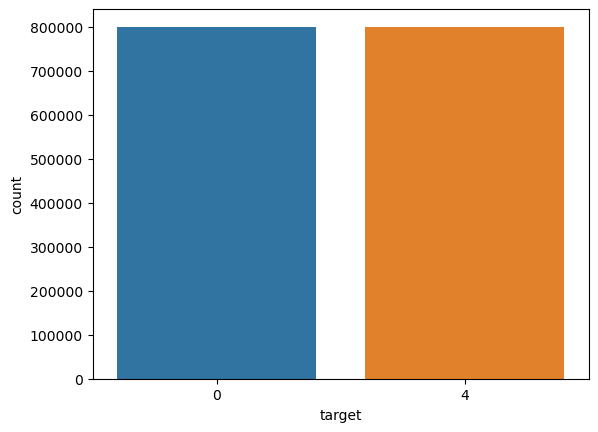

In [7]:
sns.countplot(data=df,x='target')

In [8]:
dataDF=df[['text','target']]

dataDF['target'] = dataDF['target'].replace(4,1) # 1 positive sentiment
dataDF['target'].value_counts()

/var/folders/81/qcy66zb161l2k1b8m12ltqj00000gn/T/ipykernel_50934/544667641.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



target
0    800000
1    800000
Name: count, dtype: int64

In [9]:
data_pos = dataDF[dataDF['target'] == 1]
data_neg = dataDF[dataDF['target'] == 0]#Separating positive and negative tweets
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
dataset = pd.concat([data_pos, data_neg])
dataset.shape # 20000 each +ve & -ve sentiment

(40000, 2)

In [10]:
dataset.head()

text  target
800000       I LOVE @Health4UandPets u guys r the best!!        1
800001  im meeting up with one of my besties tonight! ...       1
800002  @DaRealSunisaKim Thanks for the Twitter add, S...       1
800003  Being sick can be really cheap when it hurts t...       1
800004    @LovesBrooklyn2 he has that effect on everyone        1

### Data Cleansing

A tweet contains a lot of opinions about the data which are expressed in different ways by different users. The twitter dataset used in this project work is already labeled into two classes viz. negative and positive polarity and thus the sentiment analysis of the data becomes easy to observe the effect of various features. The raw data having polarity is highly susceptible to inconsistency and redundancy. Preprocessing of tweet include following points, 
- Remove all URLs (e.g. www.xyz.com), hash tags (e.g. #topic), targets (@username) 
- Remove Stop words. 
- Replace Repeated Characters. 
- Remove all punctuations, symbols, numbers. 
                                                 
The second phase of the system will be to cleanse the data collected, this will involve removing any punctuations and making everything lower case. This will help in the next stage of the project especially in the “Bag of Words” approach. Removing lower case words will decrease the redundancy in the database that will be used to store the words. 


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)


[nltk_data] Downloading package stopwords to /Users/VJ/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/VJ/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [13]:
# collecting the hashtags
import nltk
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [14]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [15]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

### Removing Stopwords from data

In [16]:
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000              I LOVE @Health4UandPets u guys r best!!
800001    im meeting one besties tonight! Cant wait!! - ...
800002    @DaRealSunisaKim Thanks Twitter add, Sunisa! I...
800003    Being sick really cheap hurts much eat real fo...
800004                      @LovesBrooklyn2 effect everyone
Name: text, dtype: object

### Removing Punctuation

In [17]:
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    Not much time off weekend work trip Malmï¿½ Fr...
19996                                     One day holidays
19997                     feeling right  hate DAMN HUMPREY
19998    geezi hv READ whole book personality types emb...
19999    I threw sign donnie bent over get but thingee ...
Name: text, dtype: object

### Removing Repeated Characters

In [18]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    Not much time off weekend work trip Malmï¿½ Fr...
19996                                     One day holidays
19997                     feeling right  hate DAMN HUMPREY
19998    geezi hv READ whole book personality types emb...
19999    I threw sign donnie bent over get but thingee ...
Name: text, dtype: object

### Removing URL's from data

In [19]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    Not much time off weekend work trip Malmï¿½ Fr...
19996                                     One day holidays
19997                     feeling right  hate DAMN HUMPREY
19998    geezi hv READ whole book personality types emb...
19999    I threw sign donnie bent over get but thingee ...
Name: text, dtype: object

### Removing Numeric values from tweets

In [20]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    Not much time off weekend work trip Malmï¿½ Fr...
19996                                     One day holidays
19997                     feeling right  hate DAMN HUMPREY
19998    geezi hv READ whole book personality types emb...
19999    I threw sign donnie bent over get but thingee ...
Name: text, dtype: object

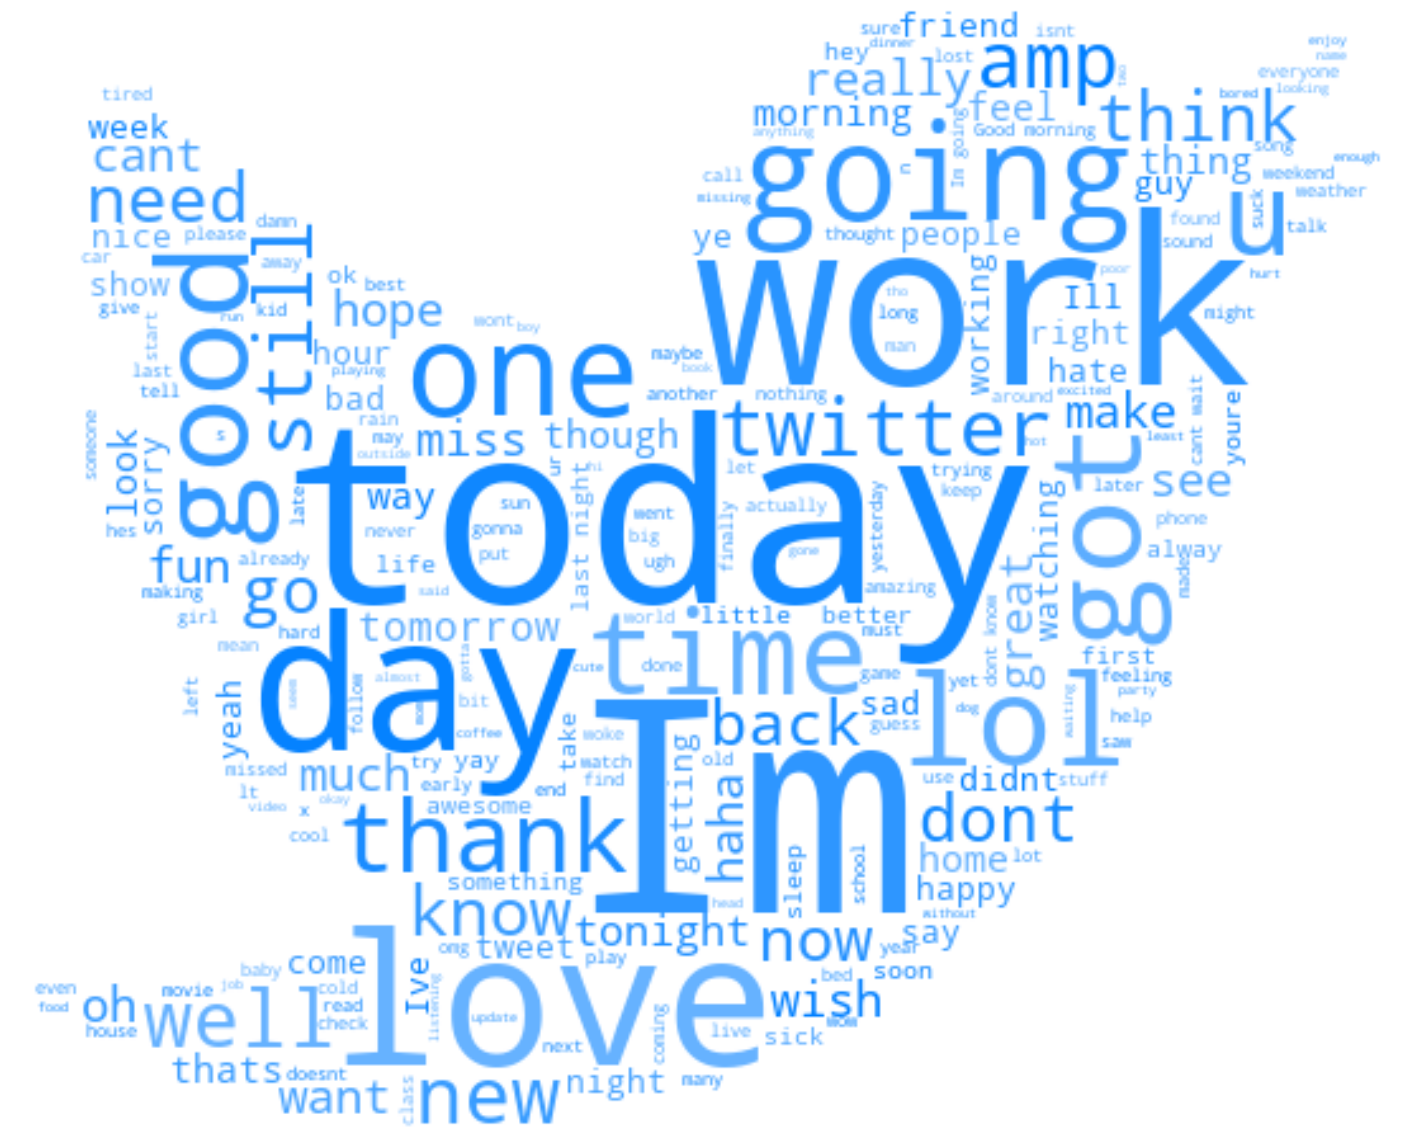

In [21]:
# Instantiate the Twitter word cloud object
image = np.array(Image.open('twitter.png'))
twitter_wc = WordCloud(background_color='white', max_words=1000, mask=image)
tweets_long_string = dataset['text'].tolist()
tweets_long_string = " ".join(tweets_long_string)
# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(18)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()


In [22]:
twitter_wc.to_file("wordcloud.png") #save to a png file

### Data Classification

To reach the ultimate goal, there was a need to clean up the individual tweets. I used a concept known as "Tokenization" in NLP. It is a method of splitting a sentence into smaller units called "tokens" to remove unnecessary elements. Another technique worthy of mention is "Lemmatization". This is a process of returning words to their "base" form. A simple illustration is shown below.


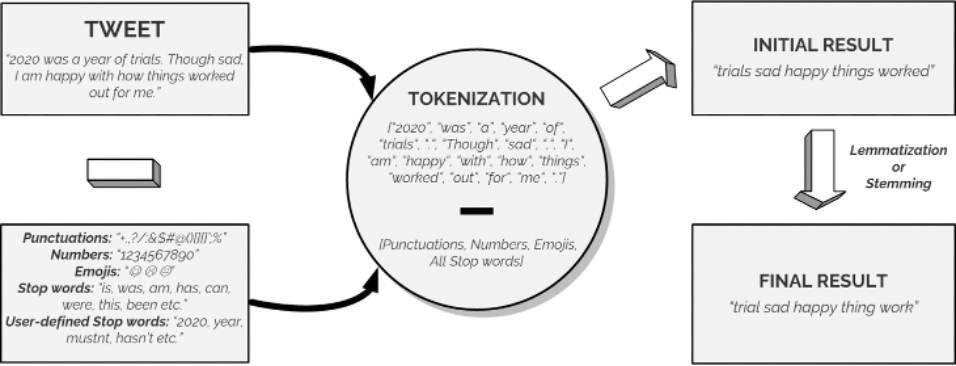

In [23]:
## Tokenizing Tweets
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)


In [24]:
dataset['text'].tail()

19995    [Not, much, time, off, weekend, work, trip, Ma...
19996                                 [One, day, holidays]
19997                [feeling, right, hate, DAMN, HUMPREY]
19998    [geezi, hv, READ, whole, book, personality, ty...
19999    [I, threw, sign, donnie, bent, over, get, but,...
Name: text, dtype: object

#### Applying Stemming to data

In [25]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000          [I, LOVE, HealthUandPets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, Cant, wai...
800002    [DaRealSunisaKim, Thanks, Twitter, add, Sunisa...
800003    [Being, sick, really, cheap, hurts, much, eat,...
800004                    [LovesBrooklyn, effect, everyone]
Name: text, dtype: object

#### Applying Lemmatizer to Data

In [26]:
lm = nltk.WordNetLemmatizer()
nltk.download('wordnet')
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /Users/VJ/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


800000          [I, LOVE, HealthUandPets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, Cant, wai...
800002    [DaRealSunisaKim, Thanks, Twitter, add, Sunisa...
800003    [Being, sick, really, cheap, hurts, much, eat,...
800004                    [LovesBrooklyn, effect, everyone]
Name: text, dtype: object

#### Plotting Word Cloud for Positive Sentiment

To get the most common words used, I made use of the POS-tag (Parts of Speech tagging) module in the NLTK library. Using the WordCloud library, one can generate a Word Cloud based on word frequency and superimpose these words on any image. In this case, I used the Twitter logo and Matplotlib to display the image. The Word Cloud shows the words with higher frequency in bigger text size while the "not-so" common words are in smaller text sizes. 					

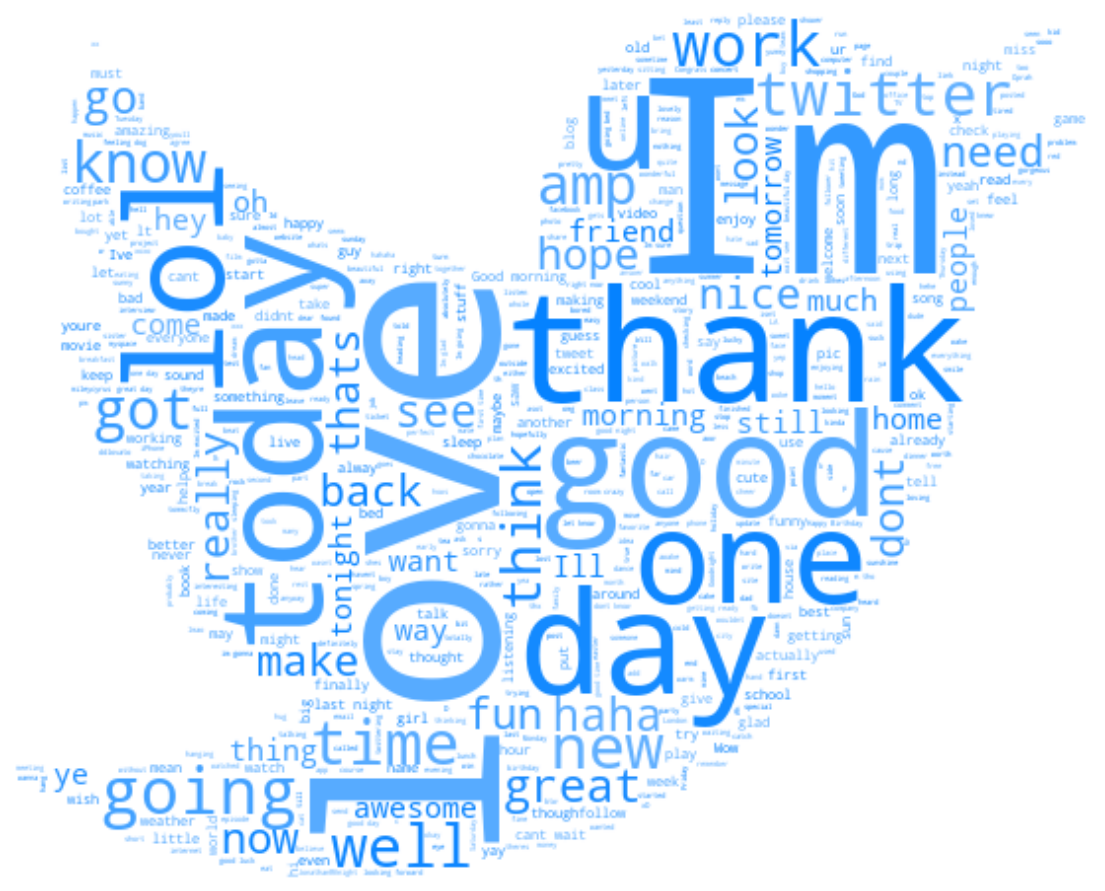

In [27]:
image = np.array(Image.open('twitter.png'))
twitter_wc = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=image)
pos_df = dataset[dataset['target']==1]['text'].apply(lambda x: ' '.join(x) )
tweets_long_string = pos_df.tolist()
tweets_long_string = " ".join(tweets_long_string)
# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

#### Plotting Word Cloud for Negative Sentiment

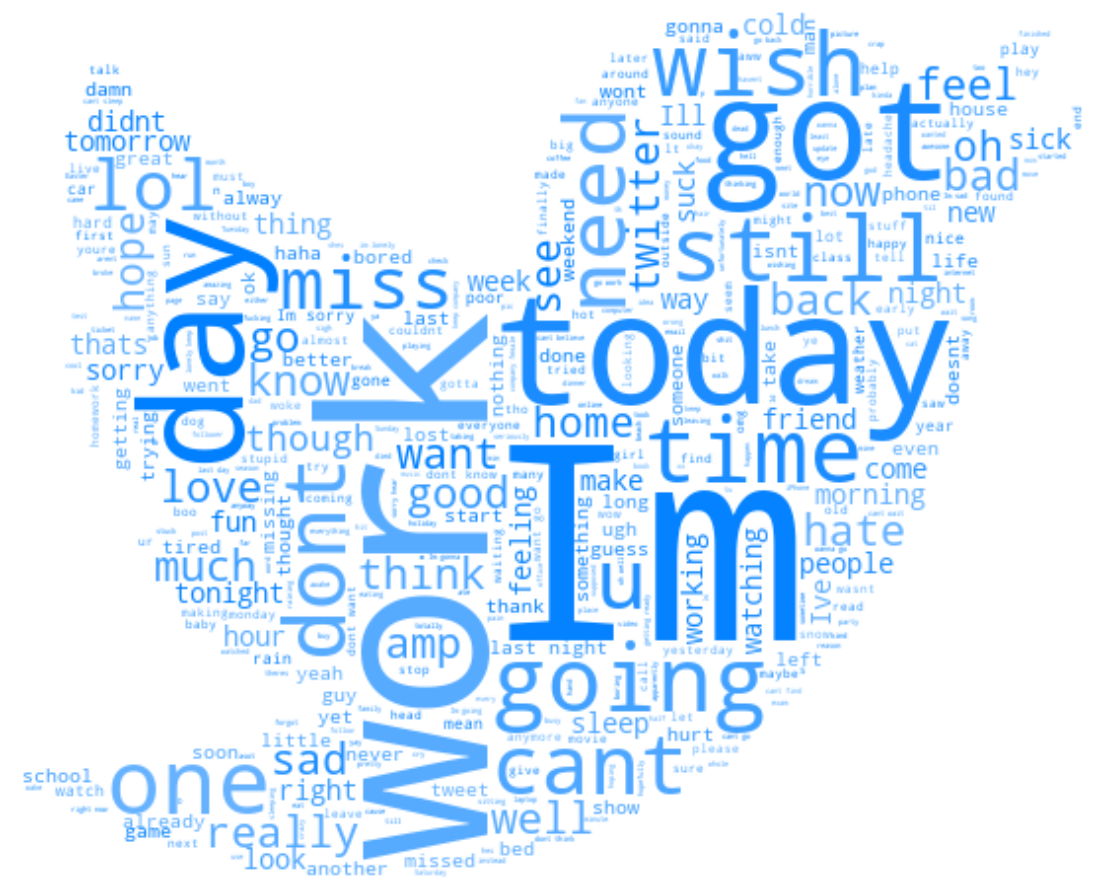

In [28]:
image = np.array(Image.open('twitter.png'))
twitter_wc = WordCloud(background_color='white', max_words=1000, mask=image)
neg_df = dataset[dataset['target']==0]['text'].apply(lambda x: ' '.join(x) )
tweets_long_string = neg_df.tolist()
tweets_long_string = " ".join(tweets_long_string)
# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

### Data Analysis and Modeling

In [29]:
### Setting up train and test data set

from sklearn.model_selection import train_test_split
temp_data = dataset
temp_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )

X=temp_data.text
y=temp_data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(40000,)
(36000,)
(4000,)


#### Setting up the Classification Model

After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

- Accuracy Score
- Confusion Matrix with Plot
- ROC-AUC Curve


#### Using TF-IDF vectorization to transform the data

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [31]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(36000, 5000)
(4000, 5000)


#### Model1 : SVM (Support Vector Machine)

In [32]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc=accuracy_score(y_test,y_pred)
print(test_acc)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.77375
[[1492  511]
 [ 394 1603]]


Text(0.5, 1.0, 'Confusion Matrix')

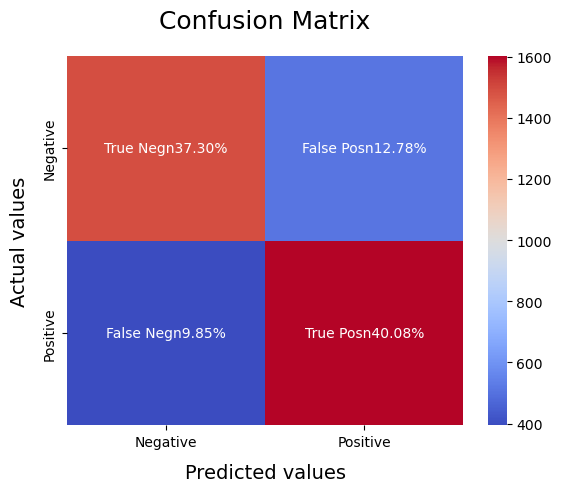

In [34]:
# Print the evaluation metrics for the dataset.
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'coolwarm',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

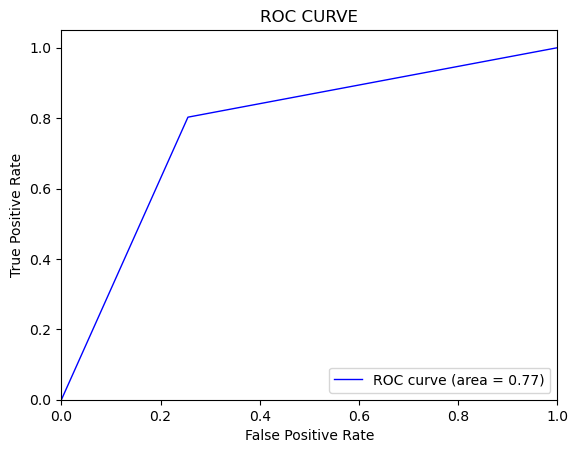

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### Model2: Logistic Regression

In [36]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)

In [37]:
test_acc=accuracy_score(y_test,y_pred)
print(test_acc)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.7735
[[1493  510]
 [ 396 1601]]


Text(0.5, 1.0, 'Confusion Matrix')

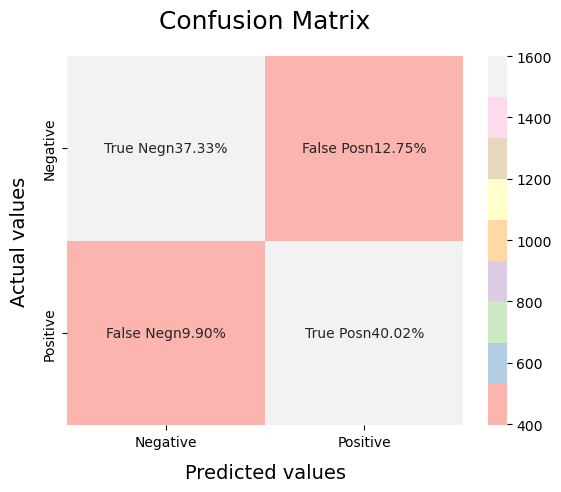

In [38]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Pastel1',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

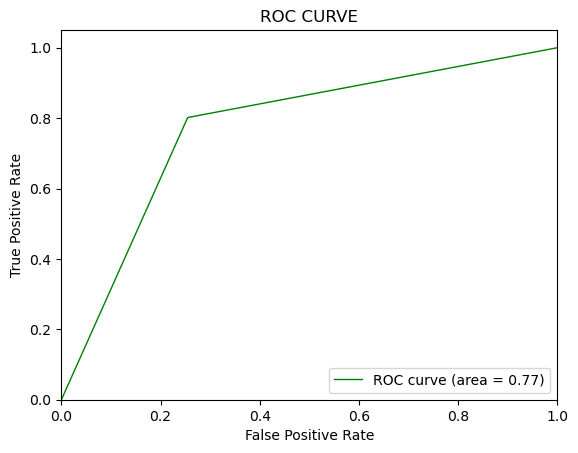

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Conclusion

Overall, we found that Logistic Regression is the most effective model for analyzing sentiments in our dataset.

Logistic Regression adheres to the principle of Occam's Razor, which states that the simplest model is often the best choice when there are no assumptions about the data. Given that our dataset lacks specific assumptions and Logistic Regression is inherently simple, this principle holds true for our analysis.